In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## Preprocessing

In [5]:
train_df.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [6]:
# Describe Numerical Data
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [8]:
# Credit History should be Object type
train_df['Credit_History'] = train_df['Credit_History'].astype('O')

In [9]:
# Describe Categorical Data
train_df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP002006,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


In [10]:
# Drop ID because it's not important for our model and it will just mislead the model
train_df.drop('Loan_ID', axis=1, inplace=True)
test_df.drop('Loan_ID', axis=1, inplace=True)

In [11]:
# Check for duplicates
train_df.duplicated().any()

False

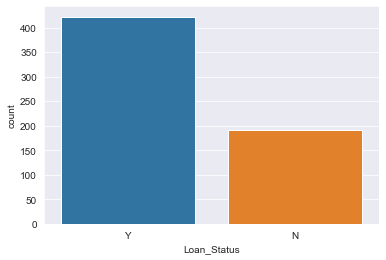

The percentage of Y class : 0.69
The percentage of N class : 0.31


In [12]:
# Check the tagret percentage
sns.countplot(train_df['Loan_Status'])
plt.show()

print('The percentage of Y class : %.2f' % ((train_df['Loan_Status'].value_counts()[0]) / len(train_df)))
print('The percentage of N class : %.2f' % ((train_df['Loan_Status'].value_counts()[1]) / len(train_df)))

In [13]:
train_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Deal with categorical columns first

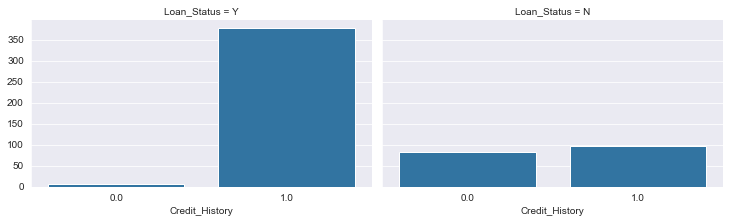

In [14]:
# Credit History

grid = sns.FacetGrid(train_df, col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History')

# we didn't give a loan for most people who got Credit History = 0
# but we did give a loan for most of people who got Credit History = 1
# so we can say if you got Credit History = 1 , you will have better chance to get a loan

# important feature

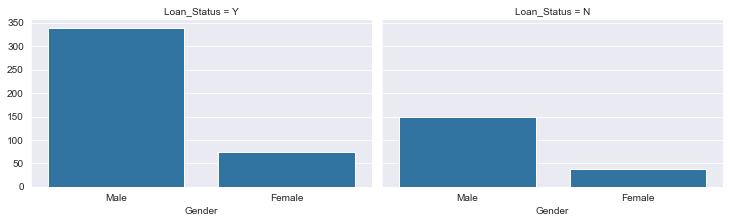

In [15]:
# Gender
grid = sns.FacetGrid(train_df, col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender')

# most males got loan and most females got one too so (No pattern)

# we will see later

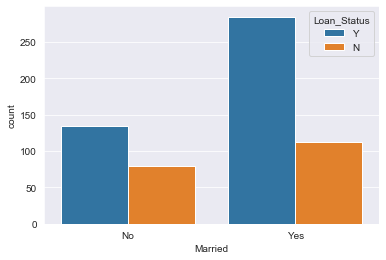

In [16]:
# Married
sns.countplot(x='Married', hue='Loan_Status', data=train_df)

# most people who get married did get a loan
# if you'r married then you have better chance to get a loan :)
# good feature

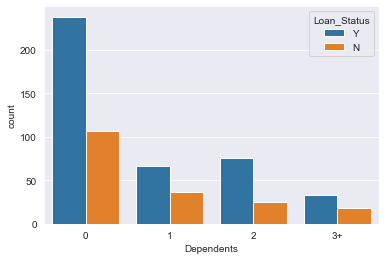

In [17]:
# Dependents

sns.countplot(x='Dependents', hue='Loan_Status', data=train_df)

# first if Dependents = 0 , we got higher chance to get a loan ((very hight chance))
# good feature

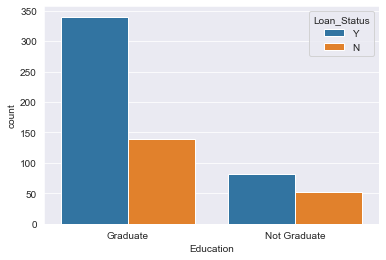

In [18]:
# Education

sns.countplot(x='Education', hue='Loan_Status', data=train_df)
# If you are graduated or not, you will get almost the same chance to get a loan (No pattern)

# Here you can see that most people did graduated, and most of them got a loan
# on the other hand, most of people who did't graduate also got a loan, but with less percentage from people who graduated

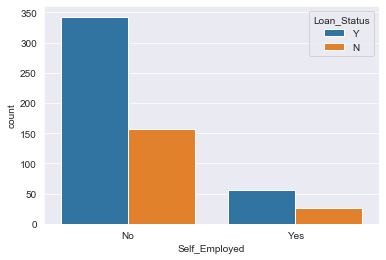

In [19]:
# Self Employes

sns.countplot(x='Self_Employed', hue='Loan_Status', data=train_df)

# Here you can see that most people who are slef employed, and most of them got a loan
# on the other hand, most of people who aren't self_-employedalso got a loan, but with less percentage from people who graduated

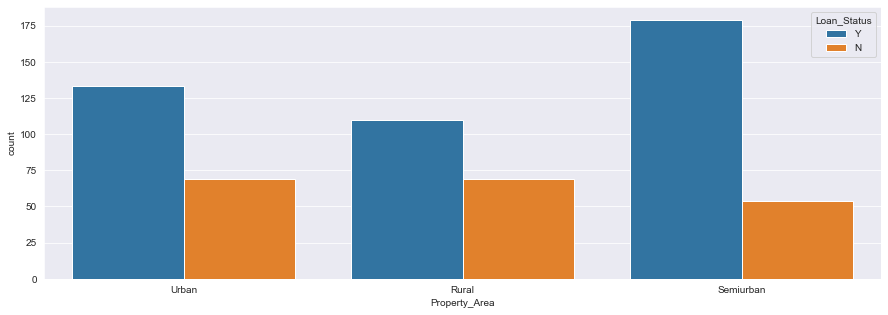

In [20]:
# Property_Area

plt.figure(figsize=(15,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=train_df);

# We can say, Semiurban Property_Area got more than 50% chance to get a loan

# good feature

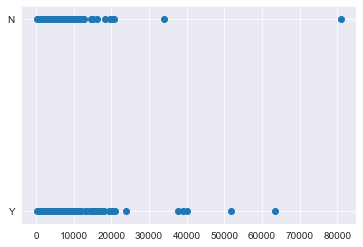

In [21]:
# ApplicantIncome

plt.scatter(train_df['ApplicantIncome'], train_df['Loan_Status']);

# No pattern

## Numerical data

In [22]:
train_df.groupby('Loan_Status').median()

# cause median is not affected by outliers

# we can see that when we got low median in CoapplicantInocme we got Loan_Status = N

# CoapplicantInocme is a good feature

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
N,3833.5,268.0,129.0,360.0
Y,3812.5,1239.5,126.0,360.0


## Missing values

In [23]:
# Get rows having missing values
null_data = train_df[train_df.isnull().any(axis=1)]
null_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
11,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1,Urban,Y
16,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1,Urban,Y
23,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0,Rural,N
24,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1,Semiurban,Y
30,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
35,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1,Urban,Y
36,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0,Urban,N


In [24]:
train_df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

### The training data distribution for columns having missing values 

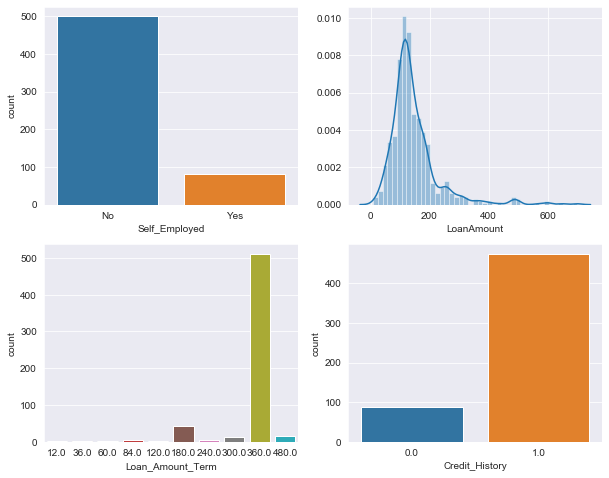

In [25]:
fig, ax = plt.subplots(2,2,figsize=(10,8))

sns.countplot(train_df['Self_Employed'], ax=ax[0,0])
sns.distplot(train_df['LoanAmount'], ax=ax[0,1])
sns.countplot(train_df['Loan_Amount_Term'], data=train_df, ax=ax[1,0])
sns.countplot(train_df['Credit_History'], data=train_df, ax=ax[1,1])

plt.show()

### The test data distribution for columns having missing values 

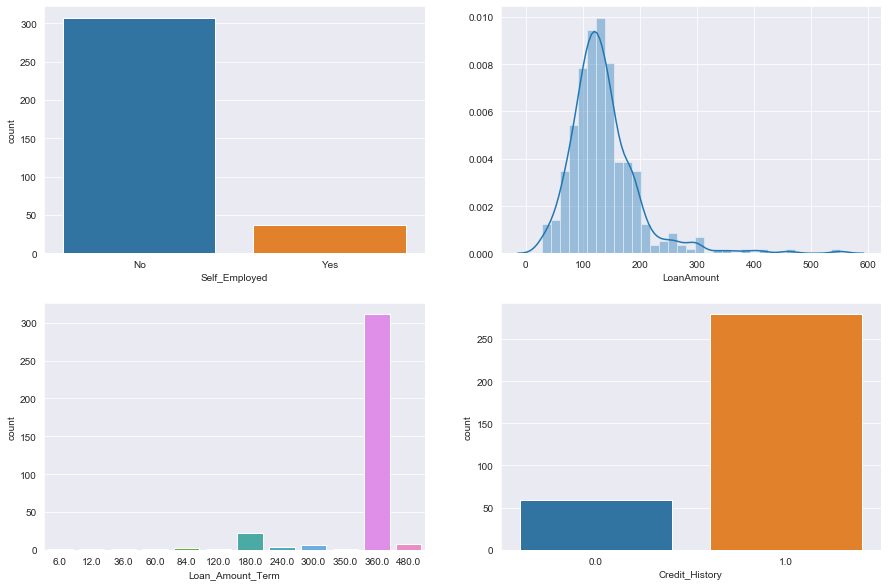

In [26]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

sns.countplot(test_df['Self_Employed'], ax=ax[0,0])
sns.distplot(test_df['LoanAmount'], ax=ax[0,1])
sns.countplot(test_df['Loan_Amount_Term'], ax=ax[1,0])
sns.countplot(test_df['Credit_History'], ax=ax[1,1])

plt.show()

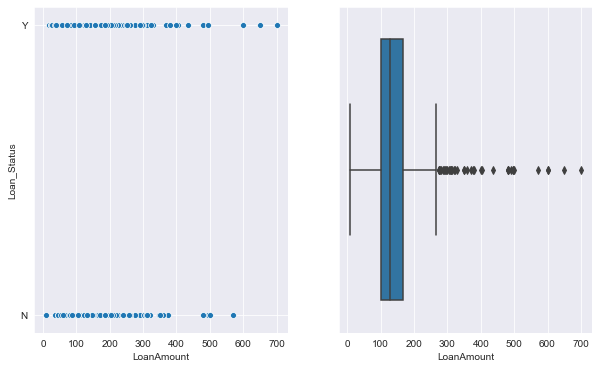

In [27]:
# Checking outliers in 'LoanAmount' column
fig, ax = plt.subplots(1,2, figsize=(10,6))
sns.scatterplot(x='LoanAmount', y='Loan_Status', data=train_df, ax=ax[0])
ax[0].set_xlabel('LoanAmount')
ax[0].set_ylabel('Loan_Status')

sns.boxplot(x=train_df['LoanAmount'], ax=ax[1])
plt.show()

In [28]:
#Q1 = train_df['LoanAmount'].quantile(0.25)
#Q3 = train_df['LoanAmount'].quantile(0.75)
#IQR = Q3-Q1
#train_df_out = train_df[(train_df['LoanAmount'] < (Q1 - 1.5 * IQR)) | (train_df['LoanAmount'] > (Q3 + 1.5 * IQR))]

In [29]:
# seperate the numerical columns from categorical columns
cat_data, num_data = [], []

for i, col in enumerate(train_df.dtypes):
    if col == object:
        cat_data.append(train_df.iloc[:, i])
    else:
        num_data.append(train_df.iloc[:, i])

In [30]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [31]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1,Urban,Y
1,Male,Yes,1,Graduate,No,1,Rural,N
2,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,Male,No,0,Graduate,No,1,Urban,Y


In [32]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


In [33]:
# Replacing missing values for categorical columns
cat_data['Married'].fillna(cat_data['Married'].value_counts().index[0], inplace=True)

cat_data['Dependents'].fillna(1, inplace=True)
test_df['Dependents'].fillna(1, inplace=True)

cat_data['Gender'].fillna("Male", inplace=True)
test_df['Gender'].fillna("Male", inplace=True)

cat_data['Credit_History'].fillna(0.0, inplace=True)
test_df['Credit_History'].fillna(0.0, inplace=True)

cat_data['Self_Employed'].fillna('No', inplace=True)
test_df['Self_Employed'].fillna('No', inplace=True)

cat_data.isnull().sum().any()

False

In [34]:
# Numerical Data
num_data['Loan_Amount_Term'].fillna(360.0, inplace=True)
test_df['Loan_Amount_Term'].fillna(360.0, inplace=True)

num_data['LoanAmount'].fillna((train_df['LoanAmount'].mean()), inplace=True)
test_df['LoanAmount'].fillna((test_df['LoanAmount'].mean()), inplace=True)

num_data.isnull().sum().any()

False

In [35]:
# transform target columns

loan_status = {'Y': 0,'N': 1} 
target = cat_data['Loan_Status']

cat_data.drop('Loan_Status', axis=1, inplace=True)

target = target.map(loan_status)

In [36]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,Male,No,0,Graduate,No,1.0,Urban
1,Male,Yes,1,Graduate,No,1.0,Rural
2,Male,Yes,0,Graduate,Yes,1.0,Urban
3,Male,Yes,0,Not Graduate,No,1.0,Urban
4,Male,No,0,Graduate,No,1.0,Urban


In [37]:
# transform other columns
cat_dummy_data = pd.get_dummies(cat_data)
cat_dummy_data.head()

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1
1,1.0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0
2,1.0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1
3,1.0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1
4,1.0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1


In [38]:
df = pd.concat([cat_dummy_data, num_data, target], axis=1)

In [39]:
df.head()

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,...,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1.0,0,1,1,0,0,1,0,0,0,...,1,0,0,0,1,5849.0,0.0,146.412162,360.0,0
1,1.0,0,1,0,1,0,0,1,0,0,...,1,0,1,0,0,4583.0,1508.0,128.000000,360.0,1
2,1.0,0,1,0,1,0,1,0,0,0,...,0,1,0,0,1,3000.0,0.0,66.000000,360.0,0
3,1.0,0,1,0,1,0,1,0,0,0,...,1,0,0,0,1,2583.0,2358.0,120.000000,360.0,0
4,1.0,0,1,1,0,0,1,0,0,0,...,1,0,0,0,1,6000.0,0.0,141.000000,360.0,0


# Train the Data

## Will use StratifiedShuffleSplit

In [40]:
X = pd.concat([cat_dummy_data, num_data], axis=1)
y = target

In [41]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [42]:
# we will use StratifiedShuffleSplit to split the data Taking into 
# consideration that we will get the same ratio on the target column
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in sss.split(X,y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
    
    
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (491, 21)
y_train shape (491,)
X_test shape (123, 21)
y_test shape (123,)


In [43]:
# almost same ratio
print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',df['Loan_Status'].value_counts().values/ len(df))


ratio of target in y_train : [0.68635438 0.31364562]
ratio of target in y_test : [0.69105691 0.30894309]
ratio of target in original_data : [0.68729642 0.31270358]


# Classification Models

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    'Logisitc':LogisticRegression(random_state=42),
    'KNN':KNeighborsClassifier(),
    'SVC':SVC(random_state=42),
    'NaiveBayes':GaussianNB(),
    'DecisionTree':DecisionTreeClassifier(random_state=42),
    'RandomForest':RandomForestClassifier(n_estimators=100, random_state=42)
         }

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_pred, y_true):
    pre = round(precision_score(y_true, y_pred),2)
    rec = round(recall_score(y_true, y_pred),2)
    f1 = round(f1_score(y_true, y_pred),2)
    loss = round(log_loss(y_true, y_pred),2)
    acc = round(accuracy_score(y_true, y_pred),2)
    #data  ={'Precision':pre, 'Recall':rec, 'F1_Score':f1, 'Logloss':loss, 'Accuracy':acc}
    #loss_df = pd.DataFrame(data, index=[0])
    #print(loss_df)
    return pre, rec, f1, loss, acc

In [46]:
# Evaluate model on train data

def eval_train_model(models, X, y):
    empty_df = pd.DataFrame()
    for name, model in models.items():
        #print("-->", name)        
        model.fit(X, y)
        pre, rec, f1, logloss, acc = loss(model.predict(X), y)
        df = pd.DataFrame({'Model':name,
                                   'Precision':pre, 
                                   'Recall':rec, 
                                   'F1_Score': f1, 
                                   'Logloss': logloss, 
                                   'Accuracy': acc, 
                                   }, index=[0])
        empty_df = empty_df.append(df, ignore_index=True)
        #print(df)
        #print("*"*20)
    return empty_df

In [47]:
scores_df = eval_train_model(models, X_train, y_train)
scores_df

,Model,Precision,Recall,F1_Score,Logloss,Accuracy
0,Logisitc,0.73,0.44,0.55,7.81,0.77
1,KNN,0.66,0.36,0.46,8.93,0.74
2,SVC,1.00,0.01,0.03,10.69,0.69
3,NaiveBayes,0.65,0.45,0.53,8.58,0.75
4,DecisionTree,1.00,1.00,1.00,0.00,1.00
5,RandomForest,1.00,1.00,1.00,0.00,1.00


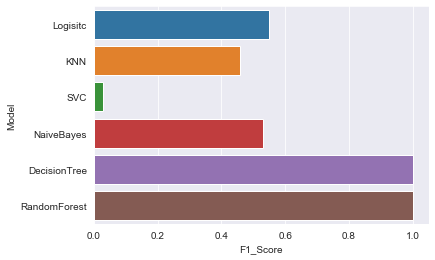

In [48]:
sns.barplot(x='F1_Score', y='Model', data=scores_df)
plt.show()

## Improving our model

### Feature Engineering

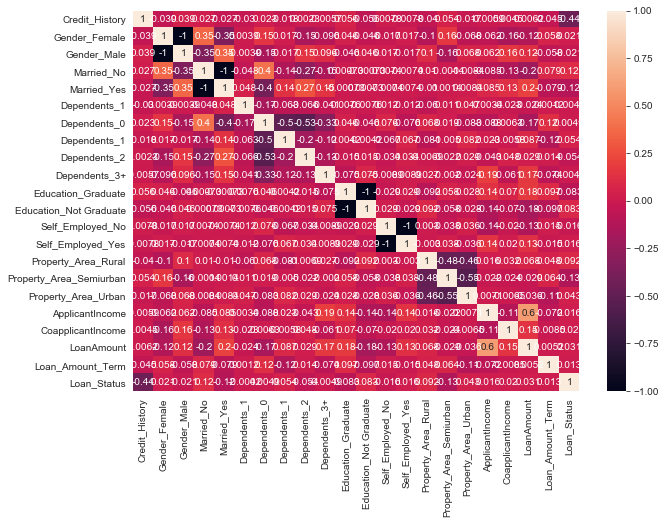

In [49]:
#orig_data = pd.read_csv('train.csv')
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True)

In [50]:
X_train.columns

Index(['Credit_History', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_1', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

In [51]:
X_train['new_col'] = X_train['CoapplicantIncome'] / X_train['ApplicantIncome']
X_train['new_col_2'] = X_train['LoanAmount'] * X_train['Loan_Amount_Term']

In [52]:
X_train.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

In [53]:
scores = eval_train_model(models, X_train, y_train)
scores

,Model,Precision,Recall,F1_Score,Logloss,Accuracy
0,Logisitc,0.00,0.00,0.00,10.83,0.69
1,KNN,0.61,0.33,0.43,9.57,0.72
2,SVC,0.00,0.00,0.00,10.83,0.69
3,NaiveBayes,0.41,0.05,0.08,11.04,0.68
4,DecisionTree,1.00,1.00,1.00,0.00,1.00
5,RandomForest,1.00,1.00,1.00,0.00,1.00


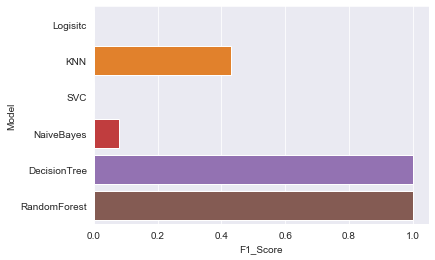

In [54]:
sns.barplot(x='F1_Score', y='Model', data=scores)
plt.show()

In [55]:
# first lets take a look at the value counts of every label

for i in range(X_train.shape[1]):
    print(X_train.iloc[:,i].value_counts(), end='\n------------------------------------------------\n')

1.0    386
0.0    105
Name: Credit_History, dtype: int64
------------------------------------------------
0    398
1     93
Name: Gender_Female, dtype: int64
------------------------------------------------
1    398
0     93
Name: Gender_Male, dtype: int64
------------------------------------------------
0    315
1    176
Name: Married_No, dtype: int64
------------------------------------------------
1    315
0    176
Name: Married_Yes, dtype: int64
------------------------------------------------
0    481
1     10
Name: Dependents_1, dtype: int64
------------------------------------------------
1    282
0    209
Name: Dependents_0, dtype: int64
------------------------------------------------
0    413
1     78
Name: Dependents_1, dtype: int64
------------------------------------------------
0    406
1     85
Name: Dependents_2, dtype: int64
------------------------------------------------
0    455
1     36
Name: Dependents_3+, dtype: int64
---------------------------------------------

Text(0.5, 1.0, 'new_col_2 after log')

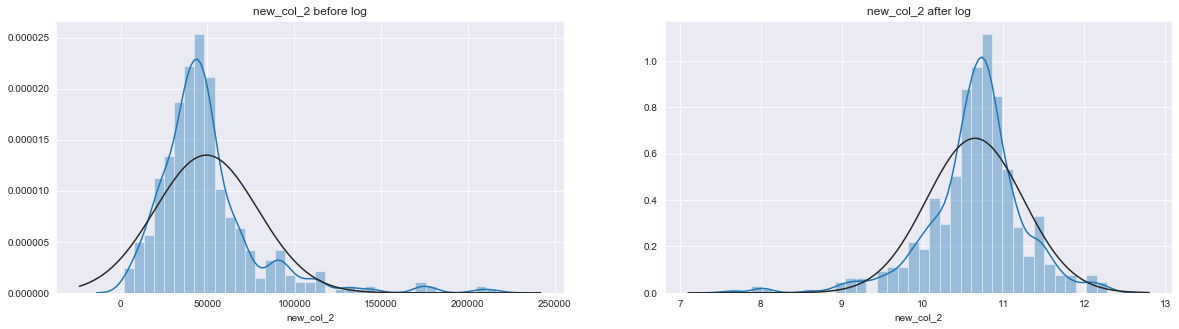

In [56]:
# new_col_2

# we can see we got right_skewed
# we can solve this problem with very simple statistical teqniq , by taking the logarithm of all the values
# because when data is normally distributed that will help improving our model

from scipy.stats import norm

fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.distplot(X_train['new_col_2'], ax=ax[0], fit=norm)
ax[0].set_title('new_col_2 before log')

X_train['new_col_2'] = np.log(X_train['new_col_2'])  # logarithm of all the values

sns.distplot(X_train['new_col_2'], ax=ax[1], fit=norm)
ax[1].set_title('new_col_2 after log')

In [57]:
scores = eval_train_model(models, X_train, y_train)
scores

,Model,Precision,Recall,F1_Score,Logloss,Accuracy
0,Logisitc,0.72,0.46,0.56,7.74,0.78
1,KNN,0.78,0.51,0.62,6.82,0.80
2,SVC,1.00,0.01,0.01,10.76,0.69
3,NaiveBayes,0.67,0.53,0.59,7.95,0.77
4,DecisionTree,1.00,1.00,1.00,0.00,1.00
5,RandomForest,1.00,1.00,1.00,0.00,1.00


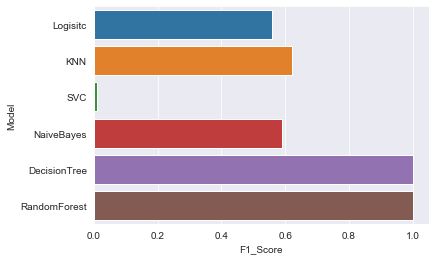

In [58]:
sns.barplot(x='F1_Score', y='Model', data=scores)
plt.show()

## Outliers

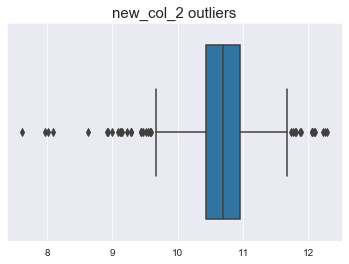

In [59]:
sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 outliers', fontsize=15);
plt.xlabel('');

In [60]:
threshold= 0.1

new_col_2_out = X_train['new_col_2']
q25, q75 = np.percentile(new_col_2_out, 25), np.percentile(new_col_2_out, 75) # Q25, Q75
print('Quartile 25: {} , Quartile 75: {}'.format(q25, q75))

iqr = q75 - q25
print('iqr: {}'.format(iqr))

cut = iqr * threshold
lower, upper = q25 - cut, q75 + cut
print('Cut Off: {}'.format(cut))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in new_col_2_out if x < lower or x > upper]
print('Nubers of Outliers: {}'.format(len(outliers)))
print('outliers:{}'.format(outliers))

data_outliers = pd.concat([X_train, y_train], axis=1)
print('\nlen X_train before dropping the outliers', len(data_outliers))
data_outliers = data_outliers.drop(data_outliers[(data_outliers['new_col_2'] > upper) | (data_outliers['new_col_2'] < lower)].index)

print('len X_train before dropping the outliers', len(data_outliers))

Quartile 25: 10.426732140732478 , Quartile 75: 10.948699064477122
iqr: 0.5219669237446443
Cut Off: 0.05219669237446443
Lower: 10.374535448358014
Upper: 11.000895756851586
Nubers of Outliers: 219
outliers:[9.980448593672257, 10.31692083029347, 10.09823162932864, 11.056588026488308, 11.502875129116727, 12.092679958175083, 11.427367576608582, 11.62589694362939, 10.083305979111964, 10.363440845928363, 11.473352689850405, 11.184421397998193, 9.692766521220475, 10.190169124654325, 10.268130666124037, 10.268130666124037, 10.31692083029347, 8.930626469173578, 11.184421397998193, 10.16277015046621, 10.268130666124037, 11.153962190513484, 9.878169744551839, 7.620705086838262, 11.010068010853415, 11.117212648304742, 11.39143556738252, 11.589886506106357, 11.502875129116727, 11.237962164926222, 10.044987114809828, 9.946547041996576, 9.980448593672257, 9.963641475355875, 11.117212648304742, 11.427367576608582, 11.654425027243928, 11.375041757606843, 11.383272256743357, 12.254862809699606, 11.629107

In [61]:
X_train = data_outliers.drop('Loan_Status', axis=1)
y_train = data_outliers['Loan_Status']

Text(0.5, 0, '')

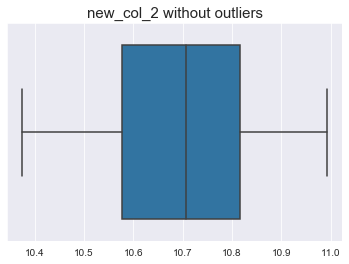

In [62]:
sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 without outliers', fontsize=15);
plt.xlabel('')

In [63]:
scores = eval_train_model(models, X_train, y_train)
scores

,Model,Precision,Recall,F1_Score,Logloss,Accuracy
0,Logisitc,0.73,0.51,0.60,6.35,0.82
1,KNN,0.88,0.52,0.66,5.08,0.85
2,SVC,1.00,0.01,0.03,9.14,0.74
3,NaiveBayes,0.64,0.53,0.58,7.11,0.79
4,DecisionTree,1.00,1.00,1.00,0.00,1.00
5,RandomForest,1.00,1.00,1.00,0.00,1.00


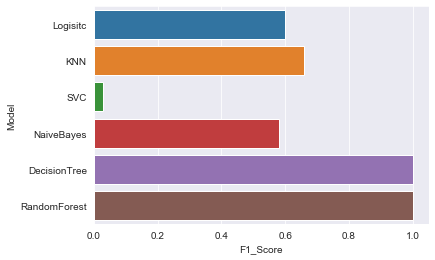

In [64]:
sns.barplot(x='F1_Score', y='Model', data=scores)
plt.show()